In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Loading Data

In [60]:
data = pd.read_csv("/workspaces/Applied-Predictive-Modeling/data/segmentationOriginal.csv")
data

,Cell,Case,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
0,207827637,Test,PS,143.247705,1,185,0,15.711864,3.954802,9.548023,...,12.474676,7.609035,2.714100,0,2,2,10.642974,2,42,14
1,207932307,Train,PS,133.752037,0,819,1,31.923274,205.878517,69.916880,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,207932463,Train,WS,106.646387,0,431,0,28.038835,115.315534,63.941748,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,207932470,Train,PS,69.150325,0,298,0,19.456140,101.294737,28.217544,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
4,207932455,Test,PS,2.887837,2,285,0,24.275735,111.415441,20.474265,...,15.407972,20.504288,45.450457,0,0,0,13.198561,0,283,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,210948219,Train,PS,85.481047,0,302,0,42.041522,23.467128,143.532872,...,26.648000,102.644041,138.501314,0,0,0,24.979033,1,208,379
2015,210952142,Test,PS,99.049010,0,607,0,38.803448,20.587931,78.372414,...,28.429877,76.190478,119.199303,0,0,0,24.524072,1,313,88
2016,210952338,Test,PS,83.319801,0,204,0,37.866667,5.994872,59.789744,...,24.139396,37.024343,63.198797,0,2,2,9.985410,2,291,402
2017,210948231,Test,WS,116.473894,0,390,0,45.643432,169.123324,147.498660,...,37.641158,154.151167,330.195989,0,0,0,22.440286,1,100,448


In [61]:
seg_data = data[data["Case"] == 'Train']
seg_data = seg_data.iloc[:, 3:]
cellid = data[['Cell']]
classid = data[['Class']]
caseid = data[['Case']]

seg_data

,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,AvgIntenStatusCh1,AvgIntenStatusCh2,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
1,133.752037,0,819,1,31.923274,205.878517,69.916880,164.153453,0,0,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,106.646387,0,431,0,28.038835,115.315534,63.941748,106.696602,0,0,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,69.150325,0,298,0,19.456140,101.294737,28.217544,31.028070,0,0,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
11,109.416426,0,256,0,18.828571,125.938776,13.600000,46.800000,0,0,...,13.922937,18.643027,40.331747,0,0,2,17.546861,0,211,495
14,104.278654,0,258,0,17.570850,124.368421,22.461538,71.206478,0,0,...,12.324971,17.747143,41.928533,0,0,2,17.660339,0,172,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,174.682654,1,431,0,149.172330,207.817961,157.757282,193.966019,1,0,...,52.454159,115.995436,155.019193,0,0,0,22.356264,1,245,458
2012,50.505043,2,1079,1,27.633010,27.592233,80.021359,91.821359,0,2,...,22.169192,61.102981,81.597289,0,0,0,32.079913,1,156,69
2013,87.784450,0,187,0,59.156425,18.759777,296.670391,406.072626,0,2,...,37.842929,218.250248,284.031945,0,0,0,11.022031,0,355,376
2014,85.481047,0,302,0,42.041522,23.467128,143.532872,233.325260,0,2,...,26.648000,102.644041,138.501314,0,0,0,24.979033,1,208,379


In [54]:
# finding columns that contain "Status" in their name
status_cols = [col for col in seg_data.columns if "Status" in col]
# dropping them
seg_data = seg_data.drop(columns=status_cols)

seg_data

,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,ConvexHullPerimRatioCh1,DiffIntenDensityCh1,DiffIntenDensityCh3,...,TotalIntenCh1,TotalIntenCh2,TotalIntenCh3,TotalIntenCh4,VarIntenCh1,VarIntenCh3,VarIntenCh4,WidthCh1,XCentroid,YCentroid
1,133.752037,819,31.923274,205.878517,69.916880,164.153453,1.263158,0.797080,31.875000,43.122283,...,24964,160997,54675,128368,18.809225,56.715352,118.388139,32.161261,215,347
2,106.646387,431,28.038835,115.315534,63.941748,106.696602,1.053310,0.935475,32.487710,35.985770,...,11552,47510,26344,43959,17.295643,37.671053,49.470524,21.185525,371,252
3,69.150325,298,19.456140,101.294737,28.217544,31.028070,1.202625,0.865829,26.732283,22.917323,...,5545,28869,8042,8843,13.818968,30.005643,24.749537,13.392830,487,295
11,109.416426,256,18.828571,125.938776,13.600000,46.800000,1.081871,0.920460,28.020045,14.870824,...,4613,30855,3332,11466,13.922937,18.643027,40.331747,17.546861,211,495
14,104.278654,258,17.570850,124.368421,22.461538,71.206478,1.075728,0.931300,27.876106,16.119469,...,4340,30719,5548,17588,12.324971,17.747143,41.928533,17.660339,172,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,174.682654,431,149.172330,207.817961,157.757282,193.966019,1.020190,0.976251,68.651282,75.569231,...,61459,85621,64996,79914,52.454159,115.995436,155.019193,22.356264,245,458
2012,50.505043,1079,27.633010,27.592233,80.021359,91.821359,1.423301,0.738215,45.208008,50.316693,...,28462,28420,82422,94576,22.169192,61.102981,81.597289,32.079913,156,69
2013,87.784450,187,59.156425,18.759777,296.670391,406.072626,1.238095,0.883381,67.993671,229.493671,...,10589,3358,53104,72687,37.842929,218.250248,284.031945,11.022031,355,376
2014,85.481047,302,42.041522,23.467128,143.532872,233.325260,1.509709,0.783153,51.529183,93.762646,...,12150,6782,41481,67431,26.648000,102.644041,138.501314,24.979033,208,379


### Transformation

In [62]:
# checking skewness

from scipy.stats import skew

round(skew(seg_data['AngleCh1']),4)

np.float64(-0.0243)

In [63]:
#for all
round(seg_data.apply(skew),4)

AngleCh1            -0.0243
AngleStatusCh1       0.9412
AreaCh1              3.5304
AreaStatusCh1        3.0649
AvgIntenCh1          2.9636
                      ...  
VarIntenStatusCh4    1.3882
WidthCh1             1.8829
WidthStatusCh1       2.0991
XCentroid           -0.1057
YCentroid            0.4964
Length: 116, dtype: float64

### Histograms

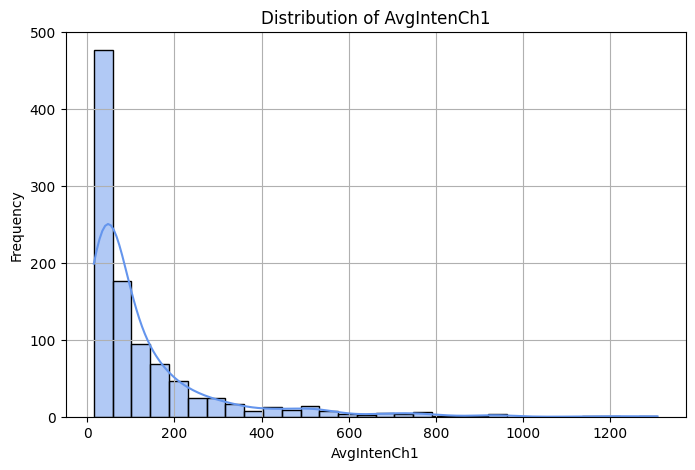

In [64]:
col = 'AvgIntenCh1'

plt.figure(figsize=(8, 5))
sns.histplot(seg_data[col], bins=30, kde=True, color='cornflowerblue')
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

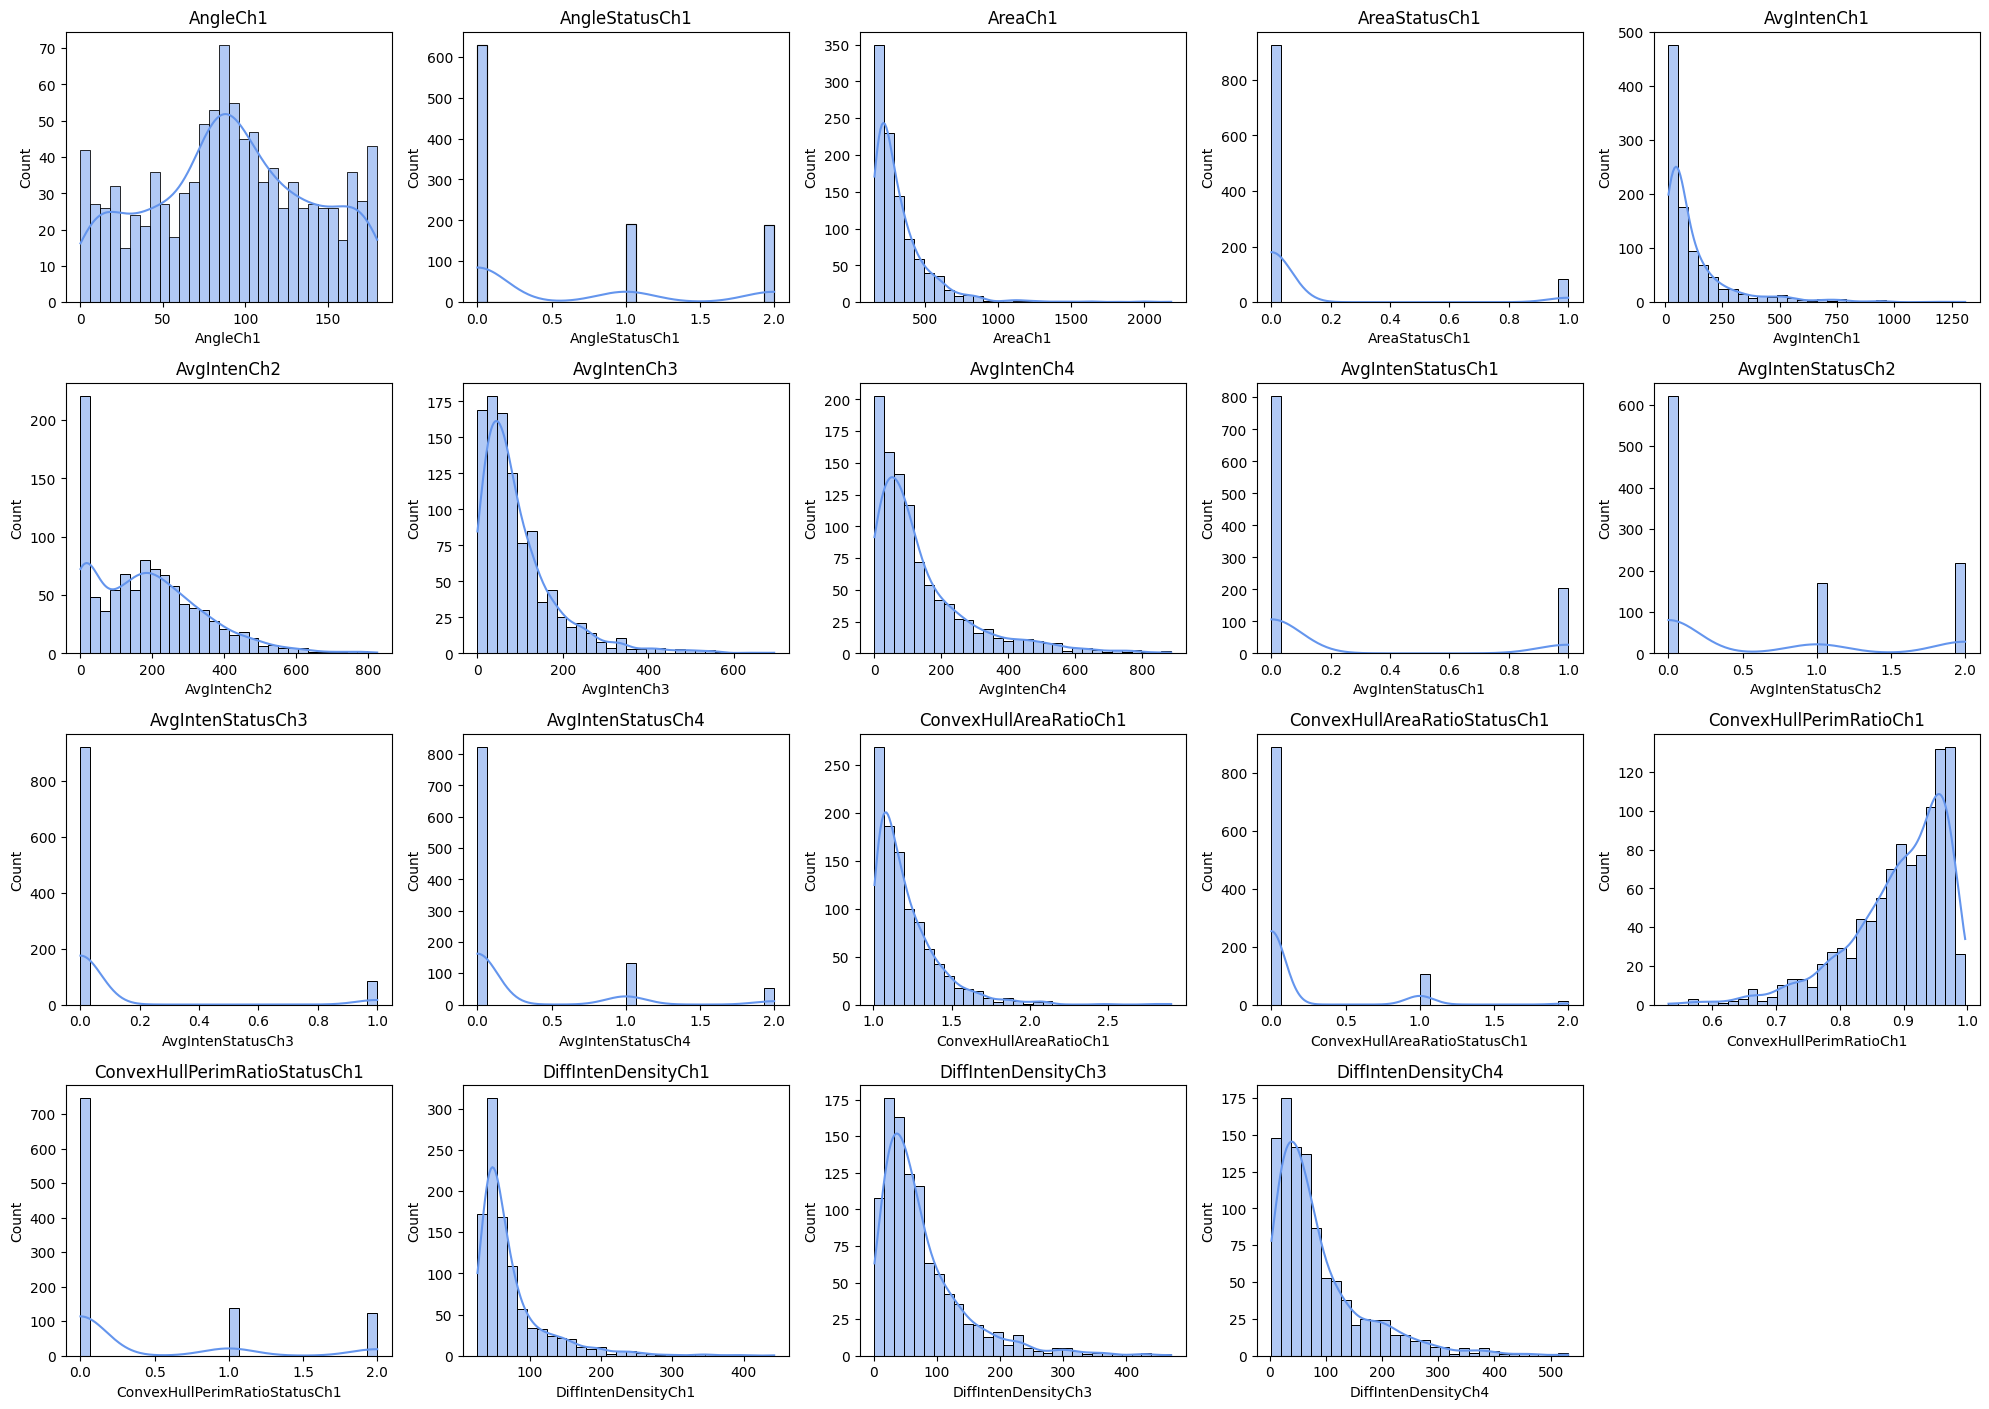

In [65]:
num_columns = len(seg_data.columns)
cols_per_row = 5
rows = math.ceil(num_columns / cols_per_row)

plt.figure(figsize=(cols_per_row * 4, rows * 3.5))


for i, column in enumerate(seg_data.columns):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.histplot(seg_data[column], bins=30, kde=True, color='cornflowerblue')
    plt.title(column)
    plt.tight_layout()

plt.show()

In [ ]:
# Optional


#for column in seg_data.columns:
#    plt.figure(figsize=(3, 2))
#    sns.histplot(seg_data[column], bins=30, kde=True, color='cornflowerblue')
#    plt.title(f'Distribution of {column}')
#    plt.xlabel(column)
#    plt.ylabel('Frequency')
#    plt.grid(True)
#    plt.tight_layout()
#    plt.show()


In [66]:
# making skewed data more normal-shaped (symmetric like a bell curve)

from scipy.stats import boxcox

#col_data = seg_data["AreaCh1"]

# box-Cox transformation (only for values > 0)
transformed_data, fitted_lambda = boxcox(seg_data["AreaCh1"])

# Add transformed data as new column
seg_data["AreaCh1_BoxCox"] = transformed_data

# Show lambda (similar to caret's summary)
print(f"Estimated lambda: {fitted_lambda}")

Estimated lambda: -0.8558687874441612


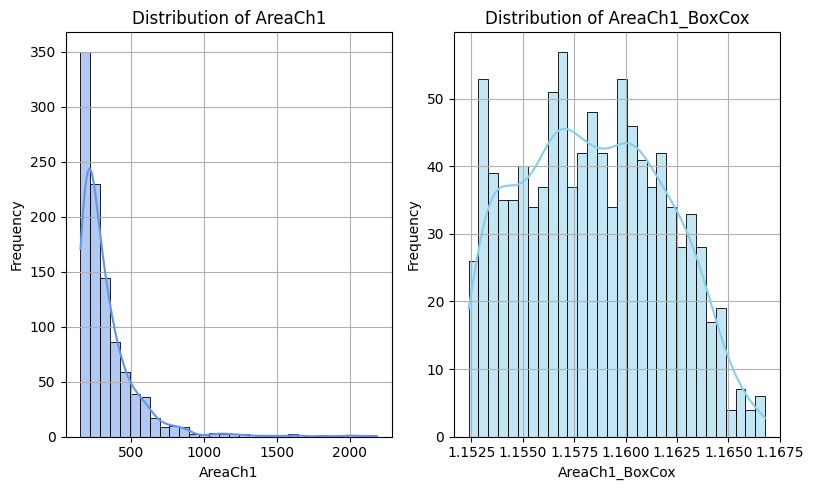

In [67]:
cols = ['AreaCh1', 'AreaCh1_BoxCox']

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.histplot(seg_data[cols[0]], bins=30, kde=True, color='cornflowerblue')
plt.title(f'Distribution of {cols[0]}')
plt.xlabel(cols[0])
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(seg_data[cols[1]], bins=30, kde=True, color='skyblue')
plt.title(f'Distribution of {cols[1]}')
plt.xlabel(cols[1])
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


In [68]:
print("Before skewness:", skew(seg_data["AreaCh1"]))
print("After skewness:", skew(seg_data["AreaCh1_BoxCox"]))

Before skewness: 3.5303544460710095
After skewness: 0.13001471195048298


In [69]:
seg_data['AreaCh1_BoxCox'].describe()

count    1009.000000
mean        1.158406
std         0.003468
min         1.152366
25%         1.155535
50%         1.158254
75%         1.161099
max         1.166784
Name: AreaCh1_BoxCox, dtype: float64

### Principal Component Analysis

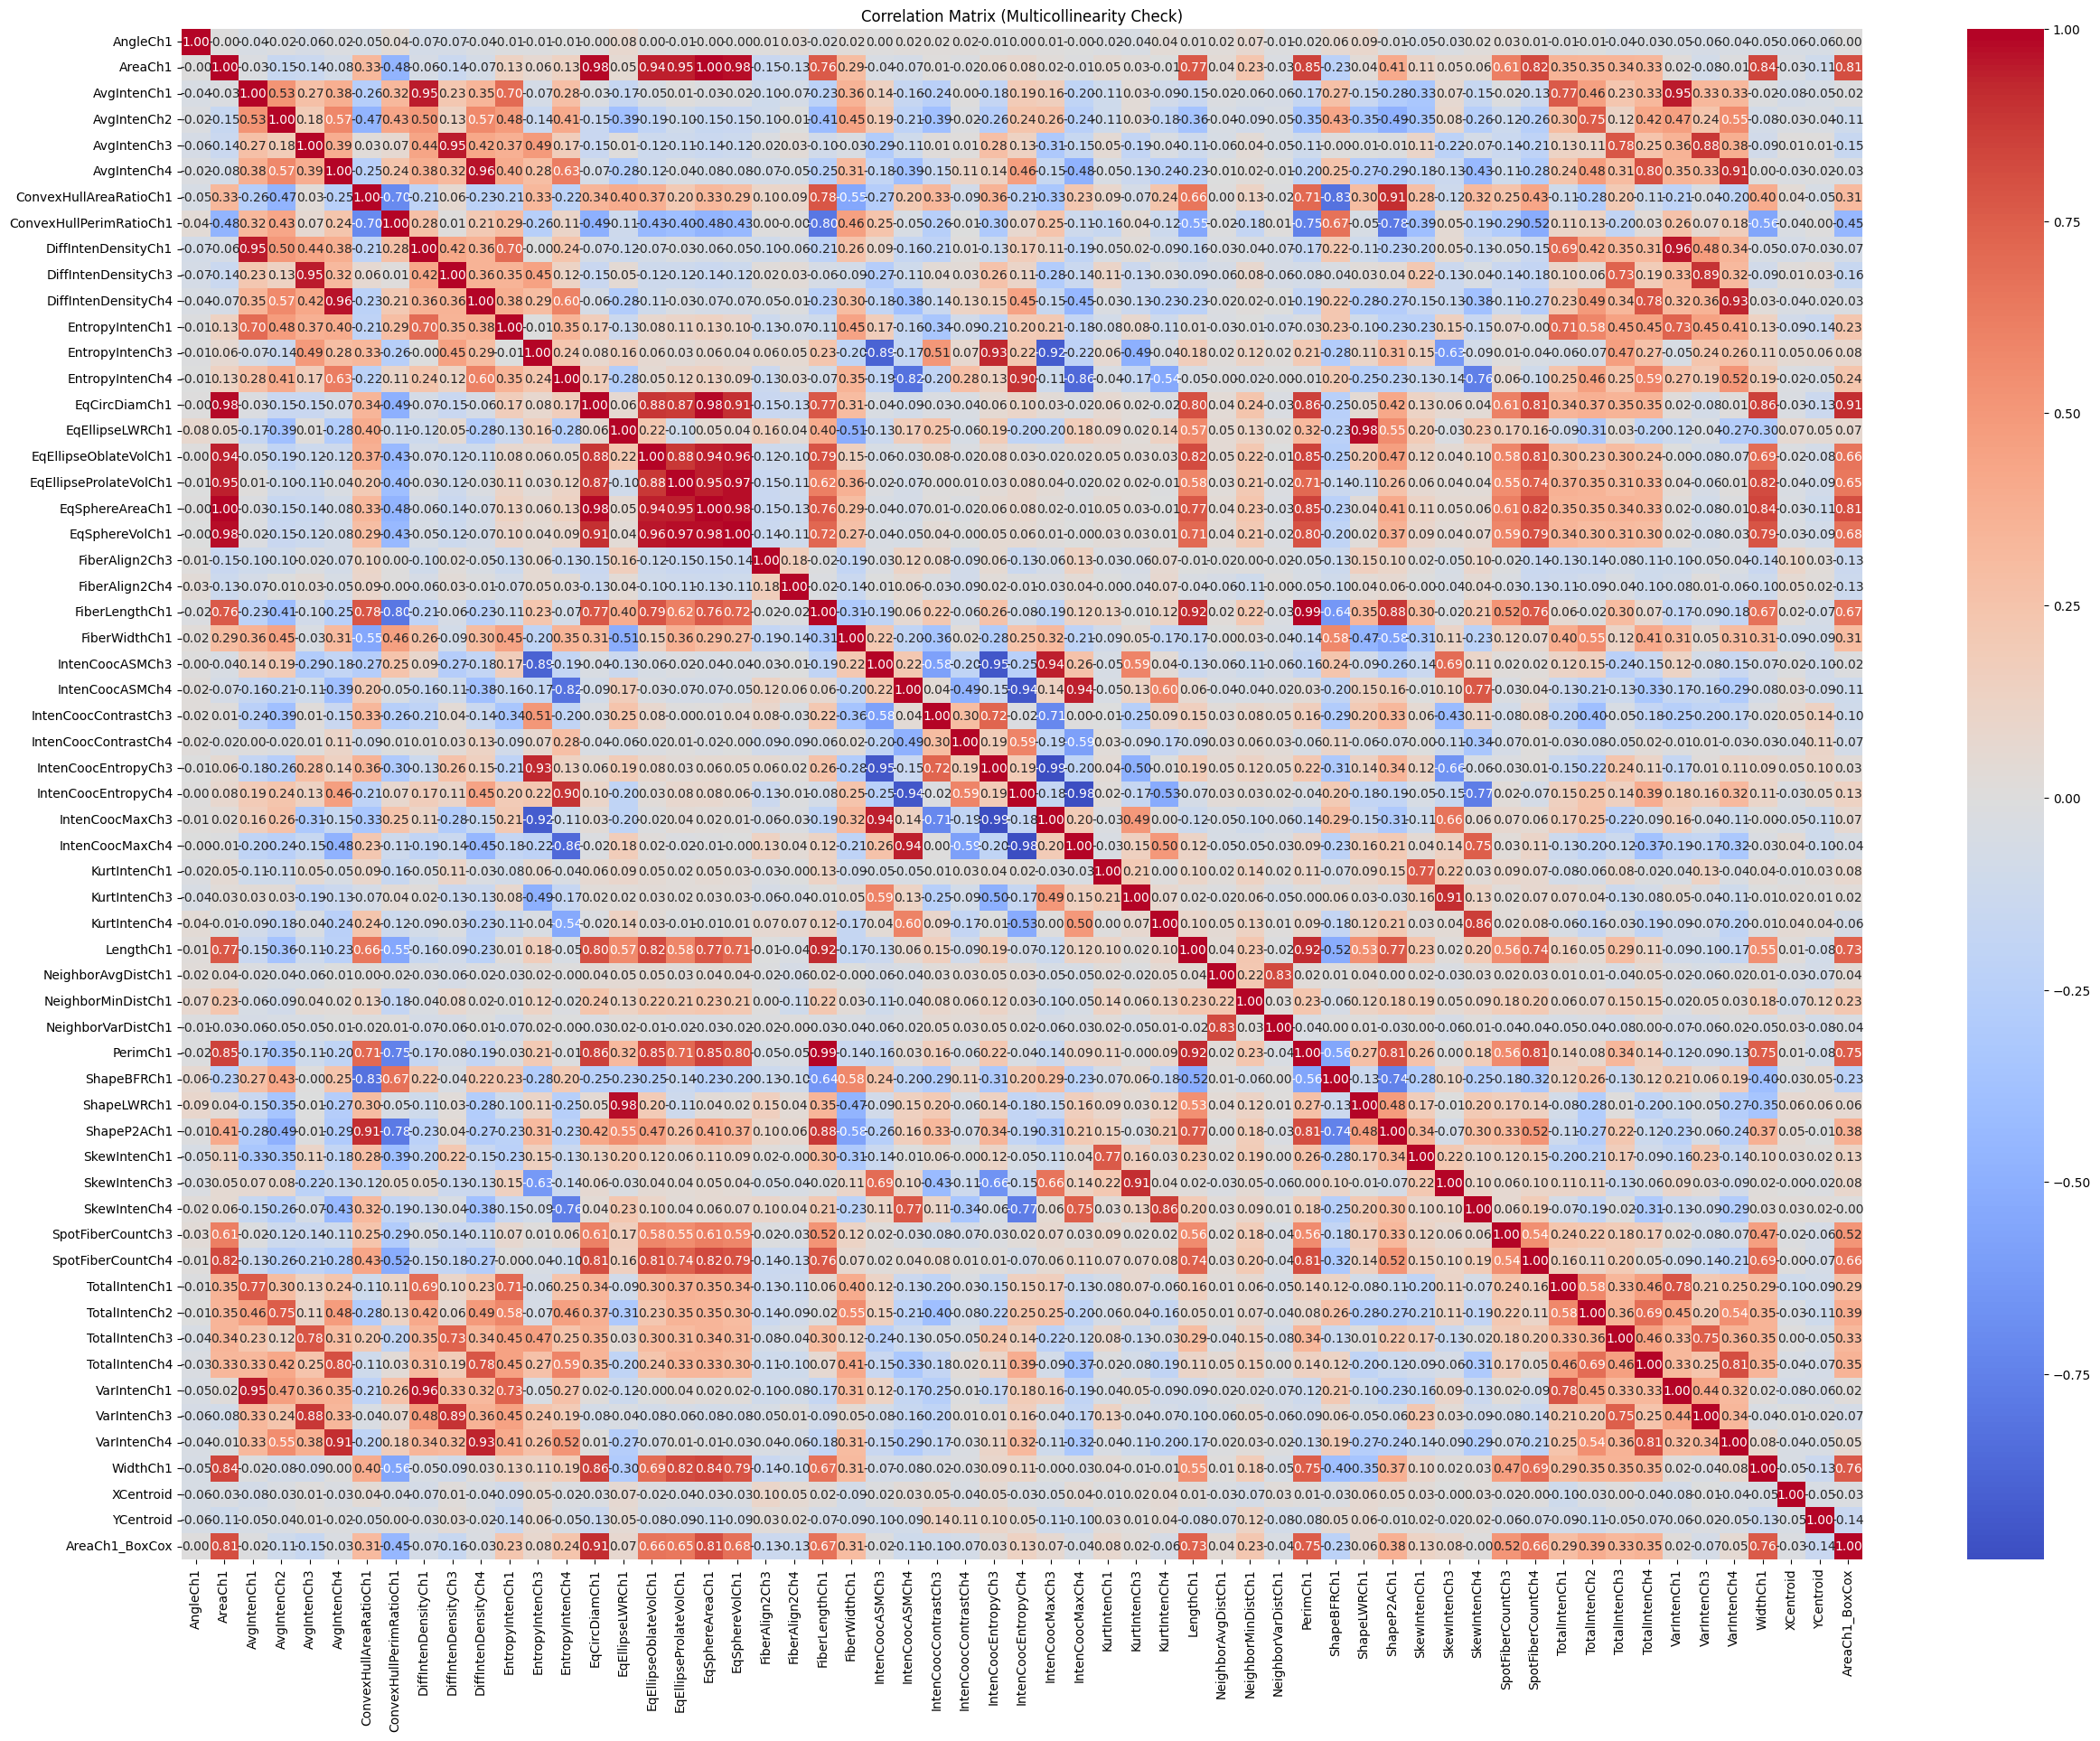

In [ ]:
# Checking correlation
plt.figure(figsize=(30, 22))
sns.heatmap(seg_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Multicollinearity Check)")
plt.show()

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Standardize the data (center = TRUE, scale = TRUE)
scaler = StandardScaler()
seg_data_scaled = scaler.fit_transform(seg_data)

# 2. Apply PCA
pca = PCA()
pca_data = pca.fit_transform(seg_data_scaled)

# 3. Convert result
pca_seg_data = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# 4. Explained variance
percent_variance = pca.explained_variance_ratio_ * 100
print(percent_variance[:3]) 


[14.96758664 11.72263471  8.76121612]


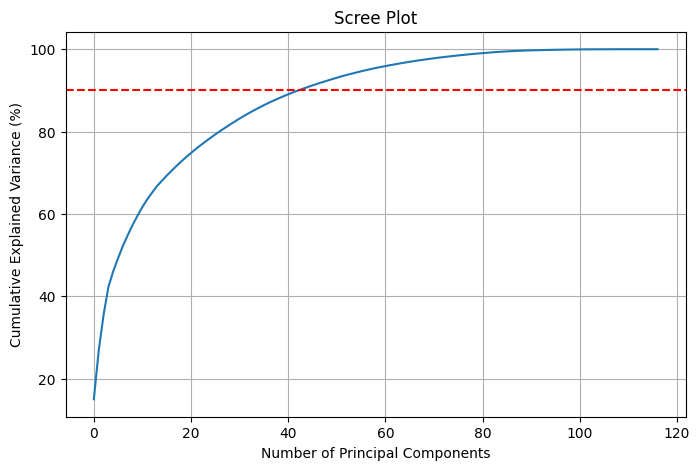

In [71]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Scree Plot")
plt.grid(True)
plt.axhline(y=90, color='red', linestyle='--')  # Optional: 90% threshold
plt.show()

In [72]:
pca_seg_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117
0,10.967667,4.072321,-0.166384,-1.668819,2.573698,-1.038439,0.969198,0.149128,3.339672,-2.876991,...,-0.037200,0.024595,0.035211,0.003008,0.004509,0.000398,7.770734e-15,1.141137e-16,-3.146244e-16,2.431065e-16
1,-0.187868,0.809167,-1.310774,-3.322462,1.662437,-0.783970,-0.122686,-0.477991,1.069393,-2.330466,...,-0.019172,0.002060,0.012227,0.011500,0.006693,0.000865,1.717563e-15,-2.480832e-16,-8.849034e-17,-3.044399e-16
2,0.885007,-1.883947,-2.186135,0.357877,-0.010699,3.385629,-1.156871,0.816516,-1.180310,0.690085,...,0.061228,0.017910,-0.100671,0.001147,-0.003881,0.001284,4.741015e-15,-1.067737e-15,-1.239160e-16,-1.701357e-16
3,-1.970165,-0.186656,0.010606,-2.537817,1.037019,1.855981,0.295476,-1.968361,1.281953,0.878449,...,0.032277,0.011391,-0.117529,0.025485,-0.001812,0.001173,-1.870850e-14,1.152687e-14,-7.652532e-16,-1.787493e-16
4,-1.126910,-0.116773,-1.942150,-3.053875,0.478730,0.422566,-0.872465,-1.449718,0.370143,1.871788,...,-0.091150,-0.057601,-0.010314,0.013005,-0.004424,0.001044,3.809663e-15,-1.087185e-15,1.259049e-16,9.887604e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,-0.129195,3.883489,-1.464582,-0.346447,1.900736,-0.011349,-1.510955,0.389706,-0.548997,1.863470,...,0.068785,-0.004298,0.008971,-0.037254,0.008431,0.000761,1.201847e-15,-3.314527e-17,-7.139634e-17,-5.964241e-17
1005,14.520909,1.805255,-0.193528,-0.643272,2.268568,0.522770,-0.541686,-0.051854,1.580131,0.202856,...,0.044372,-0.081655,0.046363,0.055774,-0.018207,0.000990,-9.515984e-16,-1.663520e-16,2.113640e-16,1.709090e-16
1006,-2.049271,0.722758,-5.534740,-0.662953,-0.842051,0.494758,1.157196,-0.084097,-0.234857,-1.274889,...,-0.004096,-0.032612,-0.058589,0.008623,-0.002051,-0.000129,-6.288890e-17,-5.271526e-17,-7.020997e-18,-3.709005e-17
1007,1.597710,-0.233414,-4.439526,-1.722379,-0.999372,-0.337499,0.716591,1.969803,0.981601,1.496920,...,-0.040725,0.022884,-0.023618,-0.034070,0.003909,0.000440,-2.287757e-15,-2.239119e-16,6.550138e-18,-1.132142e-16


In [73]:
pca_17 = PCA(n_components=17)
pca_seg_data_17 = pca_17.fit_transform(seg_data_scaled)
pca_df = pd.DataFrame(pca_seg_data_17 , columns=[f'PC{i+1}' for i in range(17)])

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,10.967680,4.072358,-0.166399,-1.668823,2.573316,-1.042645,0.972443,0.148958,3.337637,-2.878461,-0.348207,0.388733,1.416885,-1.747357,-0.866212,1.227413,-0.679045
1,-0.187871,0.809146,-1.310800,-3.322613,1.663676,-0.783601,-0.124434,-0.475557,1.073273,-2.336897,-2.019309,-0.594070,-0.660470,1.722914,0.678256,2.028357,1.167794
2,0.885008,-1.883919,-2.186074,0.357684,-0.012790,3.375811,-1.156322,0.811884,-1.190218,0.724370,-0.745793,0.107251,-2.205195,-2.353475,-2.427644,1.326444,0.362061
3,-1.970158,-0.186631,0.010638,-2.537947,1.034941,1.848679,0.297657,-1.967707,1.276122,0.898809,-1.101021,-0.098641,-1.880608,-1.956790,-2.366870,1.307712,0.118297
4,-1.126902,-0.116752,-1.942127,-3.053844,0.476766,0.418495,-0.871272,-1.450099,0.356344,1.893679,-0.464656,0.181312,-1.322074,-0.784988,-1.133317,1.059053,-0.649855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,-0.129187,3.883506,-1.464584,-0.346635,1.899562,-0.017654,-1.508927,0.395297,-0.554811,1.875474,-0.232473,0.891112,-0.958231,-0.701418,3.395513,1.917635,1.570453
1005,14.520918,1.805294,-0.193486,-0.643128,2.265881,0.519111,-0.539447,-0.056718,1.570353,0.224936,1.708259,0.113977,2.083990,0.364744,-0.831470,-1.025795,-0.281989
1006,-2.049277,0.722723,-5.534733,-0.663305,-0.839475,0.493211,1.156111,-0.071245,-0.238915,-1.282218,0.936554,-1.147490,1.255741,0.407816,-0.564581,0.031044,-0.100976
1007,1.597703,-0.233430,-4.439524,-1.722557,-0.999348,-0.340627,0.713313,1.978128,0.973174,1.500137,-0.478746,-1.801199,0.314678,1.152299,0.111783,1.764730,-0.547918


### Filtering

In [74]:
len(seg_data.columns)

117

In [ ]:
seg_data.shape

(1009, 59)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Remove columns with variance < 0.01
selector = VarianceThreshold(threshold=0.01)
reduced = selector.fit_transform(seg_data)

# Keep only columns with enough variance
seg_data_red = seg_data[seg_data.columns[selector.get_support()]]
print(seg_data_red.shape)

(1009, 57)


### Creating Dummy Variables

In [84]:
cars = pd.read_csv("/workspaces/Applied-Predictive-Modeling/data/kuiper_car.csv")
cars

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.07027,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,16175.95760,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,15731.13290,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
802,15118.89323,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
cars.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
cars.drop(columns=[col for col in cars.columns if "Unnamed" in col], inplace=True)
cars["car_type"] = cars["Type"]
cars

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,car_type
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,Sedan
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,Sedan
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,Sedan
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,Sedan
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.07027,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,Sedan
800,16175.95760,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,Sedan
801,15731.13290,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,Sedan
802,15118.89323,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,Sedan


In [87]:
cars["Type"].value_counts()

Type
Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: count, dtype: int64

In [88]:
#get dummies
cars = pd.get_dummies(cars, columns=["Type"], drop_first=True)
cars["car_type_opt"] = cars["car_type"]
cars

,Price,Mileage,Make,Model,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,car_type,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon,car_type_opt
0,17314.10313,8221,Buick,Century,Sedan 4D,6,3.1,4,1,1,1,Sedan,False,False,True,False,Sedan
1,17542.03608,9135,Buick,Century,Sedan 4D,6,3.1,4,1,1,0,Sedan,False,False,True,False,Sedan
2,16218.84786,13196,Buick,Century,Sedan 4D,6,3.1,4,1,1,0,Sedan,False,False,True,False,Sedan
3,16336.91314,16342,Buick,Century,Sedan 4D,6,3.1,4,1,0,0,Sedan,False,False,True,False,Sedan
4,16339.17032,19832,Buick,Century,Sedan 4D,6,3.1,4,1,0,1,Sedan,False,False,True,False,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.07027,16229,Saturn,L Series,L300 Sedan 4D,6,3.0,4,1,0,0,Sedan,False,False,True,False,Sedan
800,16175.95760,19095,Saturn,L Series,L300 Sedan 4D,6,3.0,4,1,1,0,Sedan,False,False,True,False,Sedan
801,15731.13290,20484,Saturn,L Series,L300 Sedan 4D,6,3.0,4,1,1,0,Sedan,False,False,True,False,Sedan
802,15118.89323,25979,Saturn,L Series,L300 Sedan 4D,6,3.0,4,1,1,0,Sedan,False,False,True,False,Sedan


In [91]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded = encoder.fit_transform(cars[['car_type']])

encoded  # dummy variables
encoder.get_feature_names_out(['car_type'])  # dummy variable names

array(['car_type_Convertible', 'car_type_Coupe', 'car_type_Hatchback',
       'car_type_Sedan', 'car_type_Wagon'], dtype=object)

In [92]:
encoded

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], shape=(804, 5))

### Regressions

In [100]:
cars

,Price,Mileage,Make,Model,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,car_type,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon,car_type_opt
0,17314.10313,8221,Buick,Century,Sedan 4D,6,3.1,4,1,1,1,Sedan,False,False,True,False,Sedan
1,17542.03608,9135,Buick,Century,Sedan 4D,6,3.1,4,1,1,0,Sedan,False,False,True,False,Sedan
2,16218.84786,13196,Buick,Century,Sedan 4D,6,3.1,4,1,1,0,Sedan,False,False,True,False,Sedan
3,16336.91314,16342,Buick,Century,Sedan 4D,6,3.1,4,1,0,0,Sedan,False,False,True,False,Sedan
4,16339.17032,19832,Buick,Century,Sedan 4D,6,3.1,4,1,0,1,Sedan,False,False,True,False,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.07027,16229,Saturn,L Series,L300 Sedan 4D,6,3.0,4,1,0,0,Sedan,False,False,True,False,Sedan
800,16175.95760,19095,Saturn,L Series,L300 Sedan 4D,6,3.0,4,1,1,0,Sedan,False,False,True,False,Sedan
801,15731.13290,20484,Saturn,L Series,L300 Sedan 4D,6,3.0,4,1,1,0,Sedan,False,False,True,False,Sedan
802,15118.89323,25979,Saturn,L Series,L300 Sedan 4D,6,3.0,4,1,1,0,Sedan,False,False,True,False,Sedan


In [101]:
bool_cols = cars.select_dtypes(include=["bool"]).columns
cars[bool_cols] = cars[bool_cols].astype(int)
cars[bool_cols].head()

,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [108]:
cars["car_type"].value_counts()

car_type
Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: count, dtype: int64

In [109]:
print(cars.columns)

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Cylinder', 'Liter',
       'Doors', 'Cruise', 'Sound', 'Leather', 'car_type', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon', 'car_type_opt'],
      dtype='object')


In [114]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 21.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [117]:
# 1. 
import statsmodels.api as sm

X = sm.add_constant(cars[["Mileage", "Type_Coupe", "Type_Hatchback", "Type_Sedan", "Type_Wagon"]])
y = cars['Price']

model1 = sm.OLS(y, X).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     79.82
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           6.17e-68
Time:                        20:04:01   Log-Likelihood:                -8373.1
No. Observations:                 804   AIC:                         1.676e+04
Df Residuals:                     798   BIC:                         1.679e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.489e+04   1353.796     33.

In [116]:
# 2. 
import statsmodels.formula.api as smf

model2 = smf.ols("Price ~ Mileage + Type_Coupe + Type_Hatchback + Type_Sedan + Type_Wagon", data=cars).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     79.82
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           6.17e-68
Time:                        20:02:56   Log-Likelihood:                -8373.1
No. Observations:                 804   AIC:                         1.676e+04
Df Residuals:                     798   BIC:                         1.679e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.489e+04   1353.796     33.

### Predictions

In [123]:
cars.head()

,Price,Mileage,Make,Model,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,car_type,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon,car_type_opt
0,17314.10313,8221,Buick,Century,Sedan 4D,6,3.1,4,1,1,1,Sedan,0,0,1,0,Sedan
1,17542.03608,9135,Buick,Century,Sedan 4D,6,3.1,4,1,1,0,Sedan,0,0,1,0,Sedan
2,16218.84786,13196,Buick,Century,Sedan 4D,6,3.1,4,1,1,0,Sedan,0,0,1,0,Sedan
3,16336.91314,16342,Buick,Century,Sedan 4D,6,3.1,4,1,0,0,Sedan,0,0,1,0,Sedan
4,16339.17032,19832,Buick,Century,Sedan 4D,6,3.1,4,1,0,1,Sedan,0,0,1,0,Sedan


In [124]:
print(cars.isna().sum())

Price             0
Mileage           0
Make              0
Model             0
Trim              0
Cylinder          0
Liter             0
Doors             0
Cruise            0
Sound             0
Leather           0
car_type          0
Type_Coupe        0
Type_Hatchback    0
Type_Sedan        0
Type_Wagon        0
car_type_opt      0
dtype: int64


In [ ]:
cars_df = cars.drop(columns=['Make', 'Model', 'Trim', 'car_type', 'car_tpe_opt'],axis=1)
cars_df['car_type_opt'] = cars_df['car_type_opt'].astype('category')
cars_df

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon,car_type_opt
0,17314.10313,8221,6,3.1,4,1,1,1,0,0,1,0,Sedan
1,17542.03608,9135,6,3.1,4,1,1,0,0,0,1,0,Sedan
2,16218.84786,13196,6,3.1,4,1,1,0,0,0,1,0,Sedan
3,16336.91314,16342,6,3.1,4,1,0,0,0,0,1,0,Sedan
4,16339.17032,19832,6,3.1,4,1,0,1,0,0,1,0,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.07027,16229,6,3.0,4,1,0,0,0,0,1,0,Sedan
800,16175.95760,19095,6,3.0,4,1,1,0,0,0,1,0,Sedan
801,15731.13290,20484,6,3.0,4,1,1,0,0,0,1,0,Sedan
802,15118.89323,25979,6,3.0,4,1,1,0,0,0,1,0,Sedan


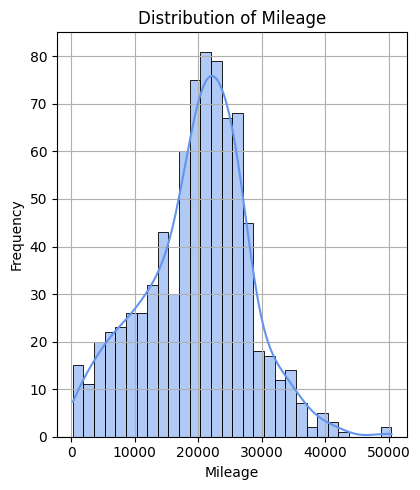

In [119]:
cols = ['Mileage']

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.histplot(cars[cols[0]], bins=30, kde=True, color='cornflowerblue')
plt.title(f'Distribution of {cols[0]}')
plt.xlabel(cols[0])
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()
